In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore') 

In [42]:
df = pd.read_csv('concrete_data.csv')
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [43]:
x = df.drop(columns='Strength')
y = df['Strength']              # since we stored df['Strength'] in 1D format, it will be stored in a 'series' format, later we need to conver it into a dataframe for futher use
# or to store it directly in 2D format, you need to write it like this y = df[['Strength']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# using KBinsDiscretizer
kmeans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

trf = ColumnTransformer([
    ('a1', kmeans, x.columns)
], remainder='passthrough')

reg = LinearRegression()

pipe = Pipeline([
    ('a', trf),
    ('b', reg)
])


# x_train_trf = pd.DataFrame(trf.fit_transform(x_train), columns=x.columns)         # by this you can not only use transformer on columns but also you will be able to convert them directly into the data frames
# x_test_trf = pd.DataFrame(trf.transform(x_test), columns=x.columns)


pipe.fit(x_train, y_train)
y_test_pred = pipe.predict(x_test)

y = pd.DataFrame(y)
y_test_pred = pd.DataFrame(y_test_pred, columns=['Strength Predicted'])


In [44]:
print(np.round(r2_score(y_test, y_test_pred),2)*100)

75.0


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     9.0                 0.0      0.0    3.0               0.0   
1     9.0                 0.0      0.0    3.0               0.0   
2     5.0                 3.0      0.0    8.0               0.0   
3     5.0                 3.0      0.0    8.0               0.0   
4     2.0                 3.0      0.0    5.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  
0               7.0             1.0  2.0  
1               7.0             1.0  2.0  
2               3.0             0.0  7.0  
3               3.0             0.0  9.0  
4               4.0             5.0  8.0  


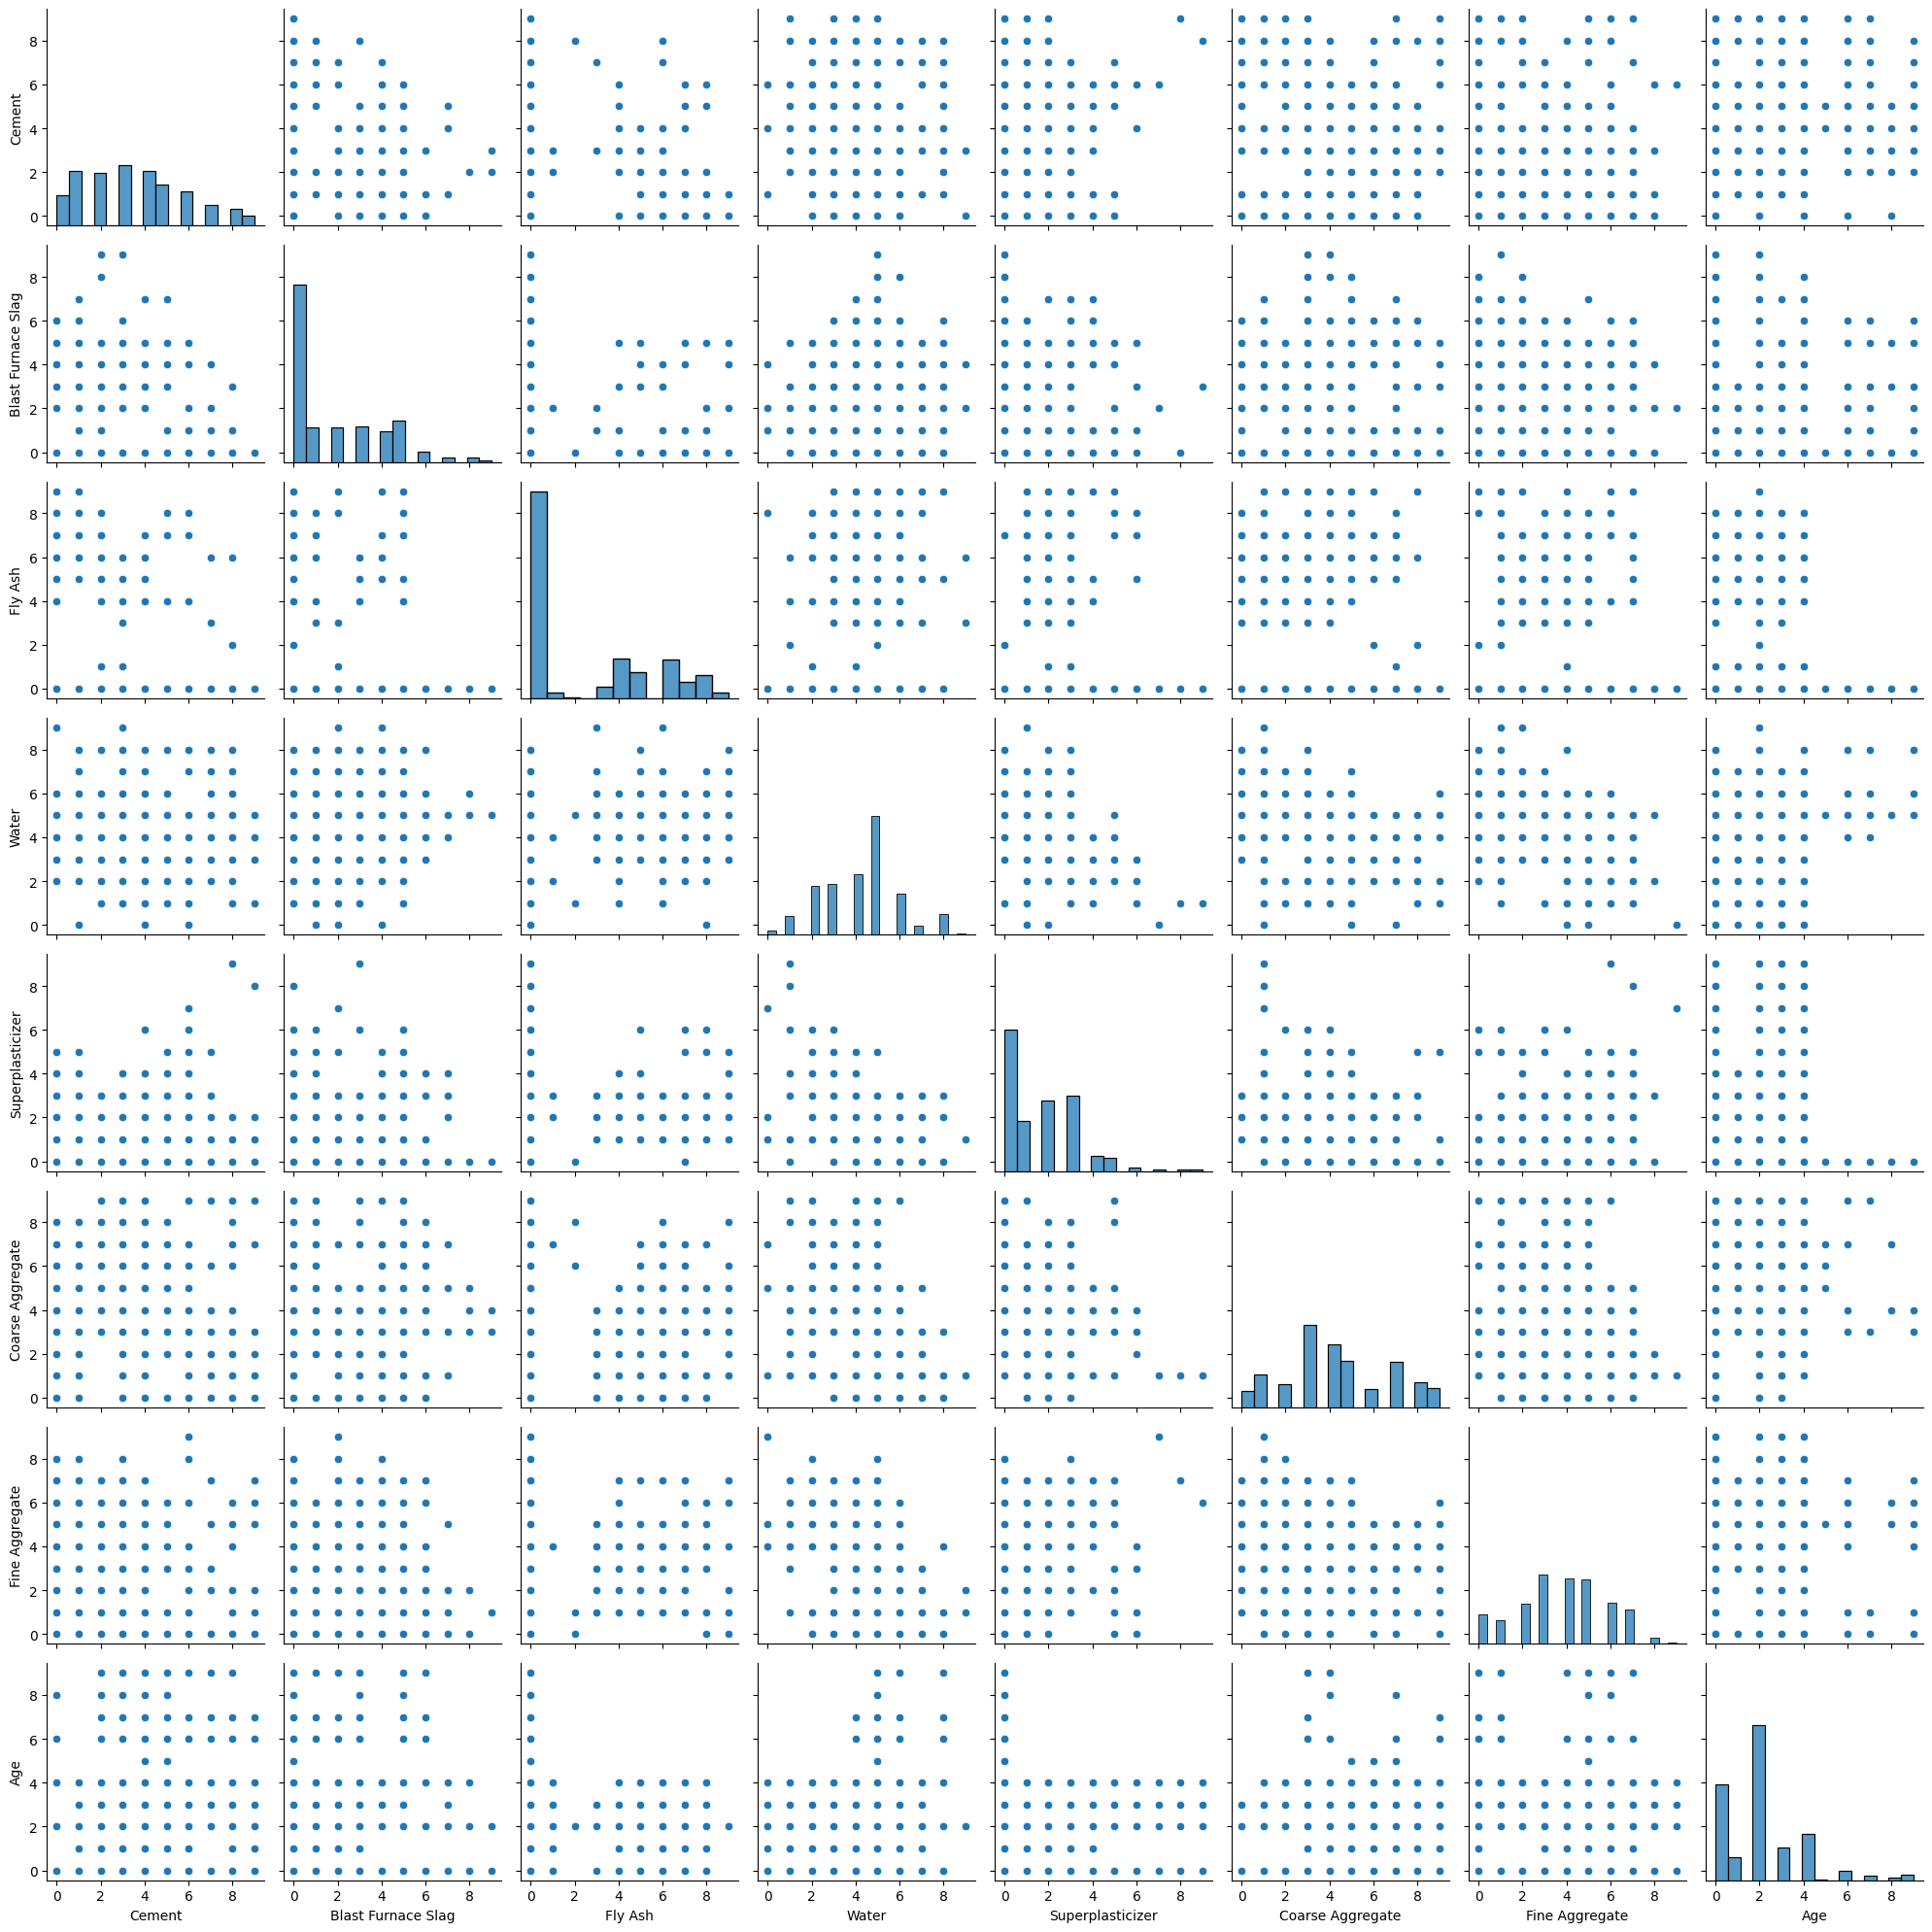

In [45]:
data = x.copy()
data = pd.DataFrame(trf.fit_transform(x), columns=x.columns)

# y = pd.DataFrame(LabelEncoder().fit_transform(y), columns=y.columns)
# data = pd.concat([data, y], axis=1)
print(data.head(5))

sns.pairplot(data)
plt.tight_layout()
plt.show()

# KMeans Clustering — When and How its used ???

## What is KMeans?
KMeans is an **unsupervised machine learning algorithm** used to group data into distinct clusters based on similarity.  
It finds central points (called **centroids**) and assigns each data point to the nearest centroid.

---

## When to Use KMeans
Use KMeans when you want to:

### 1. Group data into clusters without labels  
Example: user segmentation, grouping customers by buying behavior.

### 2. Explore structure or patterns in data  
Helpful in exploratory data analysis (EDA) to visualize groups.

### 3. Reduce dimensionality (as preprocessing)  
Cluster labels can be used as a new feature.

### 4. Identify anomalies  
Points far from centroids can be treated as outliers.

### 5. Visualize high-dimensional datasets  
You can project clusters into 2D using PCA or t-SNE.

---

## When **Not** to Use KMeans
Avoid KMeans if:

- Data is **categorical** (KMeans works only for numeric data).  
- Clusters are **not spherical** or differ heavily in density.  
- Data contains many outliers (because centroids shift).  
- You don’t want to predefine the number of clusters (`n_clusters`).

---

## How KMeans Works (Steps)
1. Choose number of clusters `k`.  
2. Randomly pick `k` initial centroids.  
3. Assign each point to nearest centroid.  
4. Update centroids based on assigned points.  
5. Repeat until convergence (centroids stop moving).

---

## How to Use KMeans in Code

### Import
```python
from sklearn.cluster import KMeans


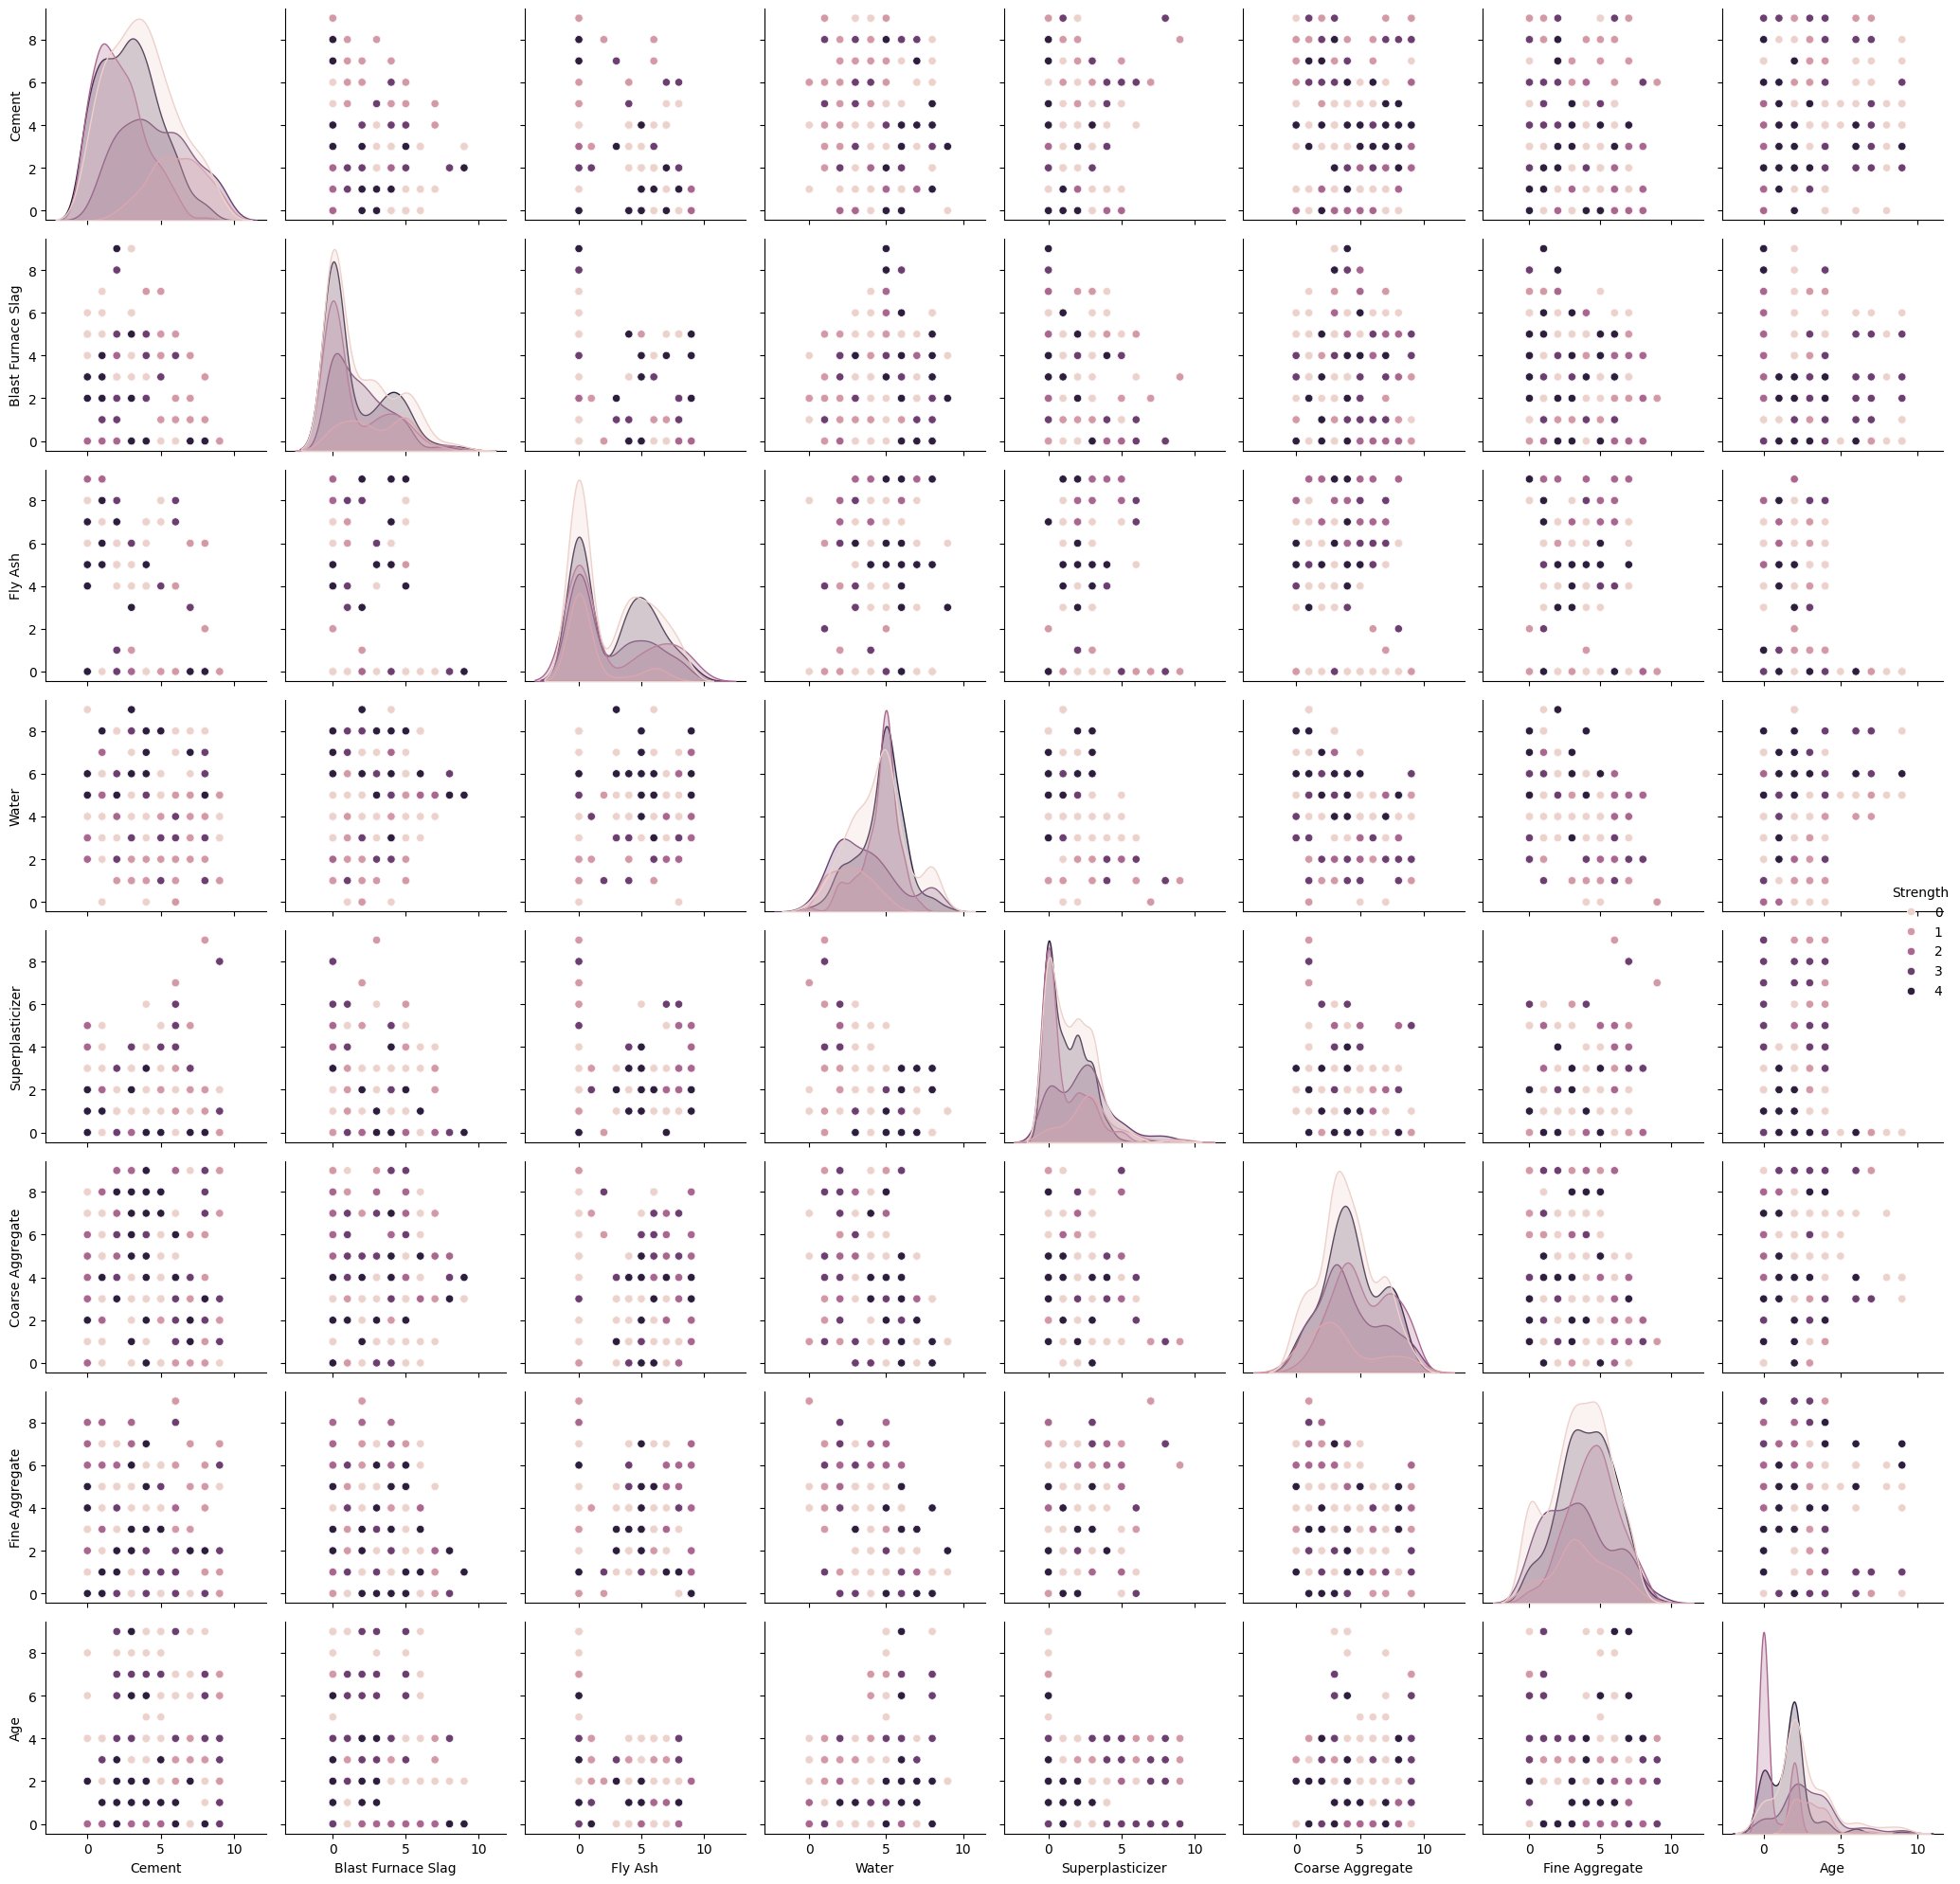

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
a = kmeans.fit_predict(y)
a = pd.DataFrame(a, columns=y.columns)      # since y was in 1D we converted it into 2D
data2 = pd.concat([data, a], axis=1)
# data2

# so the code i have written above, there you can manually enter the number of clusteres you want and can use them as you like
# here i have used clusters on y, you use them as hue

sns.pairplot(data2, hue='Strength')
plt.tight_layout()
plt.show()